In [1]:
install.packages("arules", repo = "https://cran.r-project.org")

package 'arules' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\Bradley Bailey\AppData\Local\Temp\Rtmpsd3OjP\downloaded_packages


In [2]:
library(arules)

Warning message:
: package 'arules' was built under R version 3.2.5Loading required package: Matrix

Attaching package: 'arules'

The following objects are masked from 'package:base':

    abbreviate, write



In [3]:
groceries <- read.transactions("../csv/groceries.csv", sep = ",")

In [4]:
summary(groceries)

transactions as itemMatrix in sparse format with
 9835 rows (elements/itemsets/transactions) and
 169 columns (items) and a density of 0.02609146 

most frequent items:
      whole milk other vegetables       rolls/buns             soda 
            2513             1903             1809             1715 
          yogurt          (Other) 
            1372            34055 

element (itemset/transaction) length distribution:
sizes
   1    2    3    4    5    6    7    8    9   10   11   12   13   14   15   16 
2159 1643 1299 1005  855  645  545  438  350  246  182  117   78   77   55   46 
  17   18   19   20   21   22   23   24   26   27   28   29   32 
  29   14   14    9   11    4    6    1    1    1    1    3    1 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  1.000   2.000   3.000   4.409   6.000  32.000 

includes extended item information - examples:
            labels
1 abrasive cleaner
2 artif. sweetener
3   baby cosmetics

In [5]:
inspect(groceries[1:5])

  items                     
1 {citrus fruit,            
   margarine,               
   ready soups,             
   semi-finished bread}     
2 {coffee,                  
   tropical fruit,          
   yogurt}                  
3 {whole milk}              
4 {cream cheese,            
   meat spreads,            
   pip fruit,               
   yogurt}                  
5 {condensed milk,          
   long life bakery product,
   other vegetables,        
   whole milk}              


In [6]:
itemFrequency(groceries[, 4:7])

baby food             bags    baking powder bathroom cleaner 
    0.0001016777     0.0004067107     0.0176919166     0.0027452974

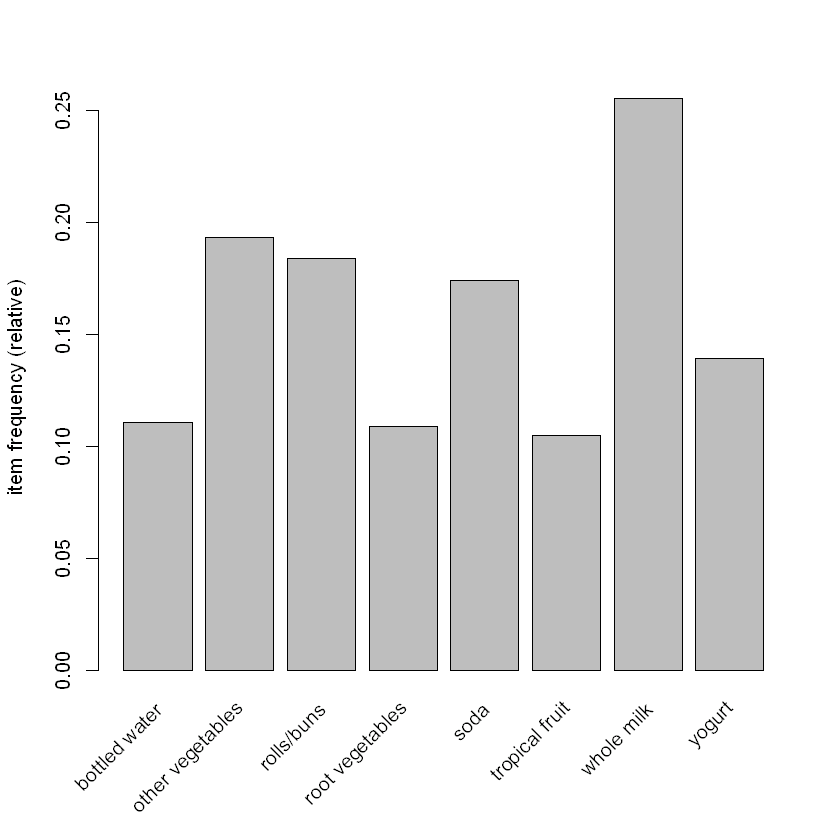

In [7]:
itemFrequencyPlot(groceries, support = 0.1)

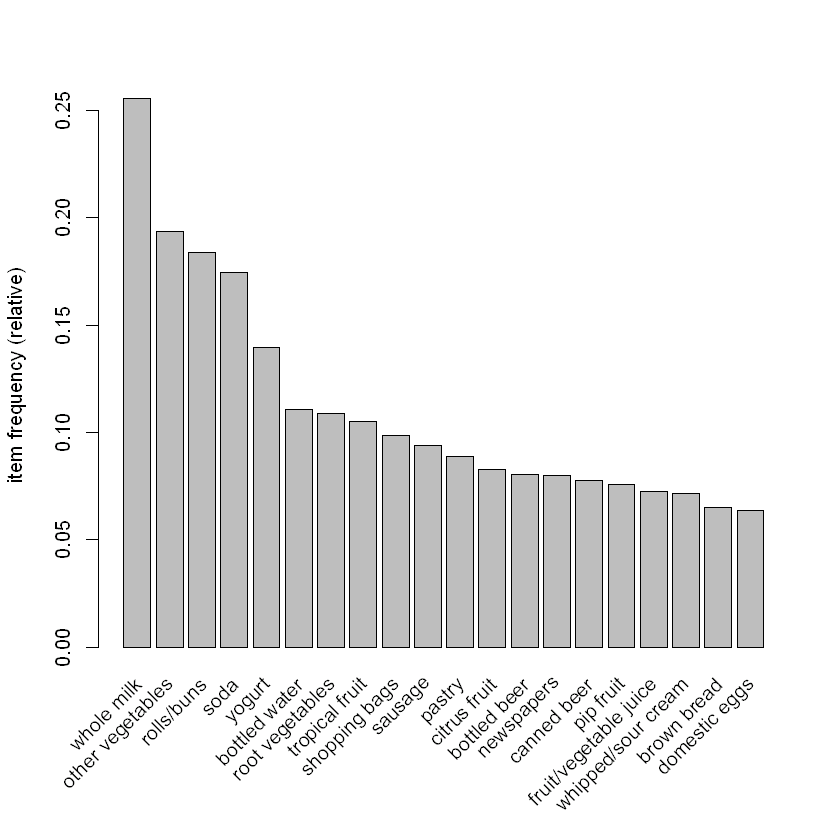

In [8]:
itemFrequencyPlot(groceries, topN = 20)

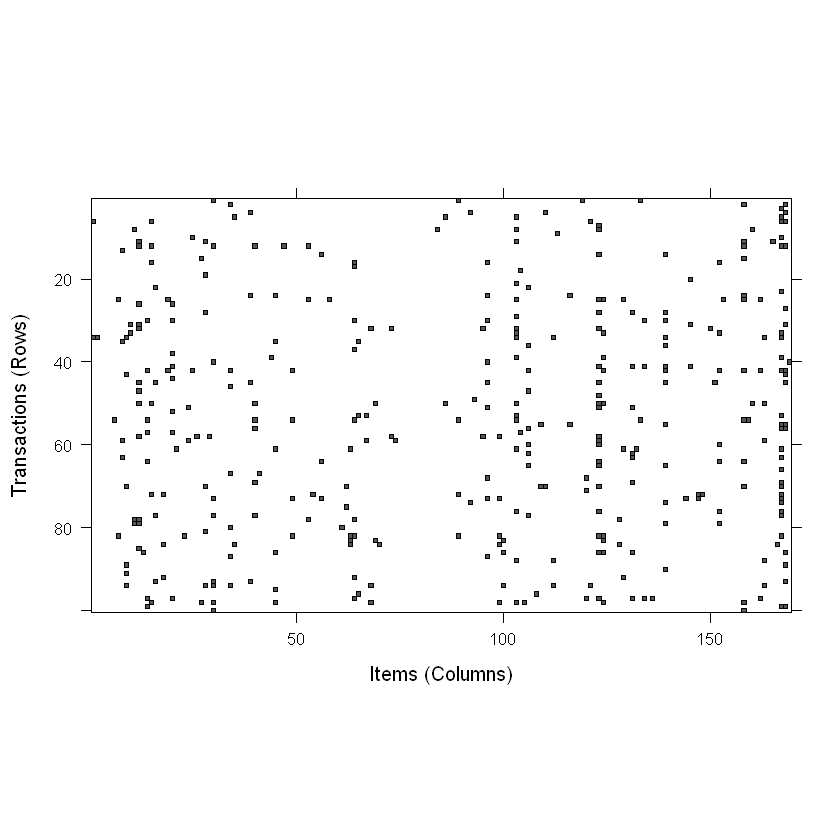

In [10]:
image(groceries[1:100])

In [11]:
apriori(groceries)

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport support minlen maxlen target
        0.8    0.1    1 none FALSE            TRUE     0.1      1     10  rules
   ext
 FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 983 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[169 item(s), 9835 transaction(s)] done [0.03s].
sorting and recoding items ... [8 item(s)] done [0.00s].
creating transaction tree ... done [0.01s].
checking subsets of size 1 2 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


set of 0 rules 

In [13]:
grocery_rules <- apriori(groceries, parameter = list(minlen = 2, support = 0.006,
                                                 confidence = .25))

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport support minlen maxlen target
       0.25    0.1    1 none FALSE            TRUE   0.006      2     10  rules
   ext
 FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 59 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[169 item(s), 9835 transaction(s)] done [0.01s].
sorting and recoding items ... [109 item(s)] done [0.00s].
creating transaction tree ... done [0.02s].
checking subsets of size 1 2 3 4 done [0.00s].
writing ... [463 rule(s)] done [0.00s].
creating S4 object  ... done [0.02s].


In [14]:
grocery_rules

set of 463 rules 

In [15]:
summary(grocery_rules)

set of 463 rules

rule length distribution (lhs + rhs):sizes
  2   3   4 
150 297  16 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  2.000   2.000   3.000   2.711   3.000   4.000 

summary of quality measures:
    support           confidence          lift       
 Min.   :0.006101   Min.   :0.2500   Min.   :0.9932  
 1st Qu.:0.007117   1st Qu.:0.2971   1st Qu.:1.6229  
 Median :0.008744   Median :0.3554   Median :1.9332  
 Mean   :0.011539   Mean   :0.3786   Mean   :2.0351  
 3rd Qu.:0.012303   3rd Qu.:0.4495   3rd Qu.:2.3565  
 Max.   :0.074835   Max.   :0.6600   Max.   :3.9565  

mining info:
      data ntransactions support confidence
 groceries          9835   0.006       0.25

In [16]:
inspect(grocery_rules[1:3])

  lhs             rhs               support     confidence lift    
1 {pot plants} => {whole milk}      0.006914082 0.4000000  1.565460
2 {pasta}      => {whole milk}      0.006100661 0.4054054  1.586614
3 {herbs}      => {root vegetables} 0.007015760 0.4312500  3.956477


In [18]:
inspect(sort(grocery_rules, by = "lift")[1:10]) 

   lhs                   rhs                      support confidence     lift
1  {herbs}            => {root vegetables}    0.007015760  0.4312500 3.956477
2  {berries}          => {whipped/sour cream} 0.009049314  0.2721713 3.796886
3  {other vegetables,                                                        
    tropical fruit,                                                          
    whole milk}       => {root vegetables}    0.007015760  0.4107143 3.768074
4  {beef,                                                                    
    other vegetables} => {root vegetables}    0.007930859  0.4020619 3.688692
5  {other vegetables,                                                        
    tropical fruit}   => {pip fruit}          0.009456024  0.2634561 3.482649
6  {beef,                                                                    
    whole milk}       => {root vegetables}    0.008032537  0.3779904 3.467851
7  {other vegetables,                                           

In [21]:
berry_rules <- subset(grocery_rules, items %in% "berries")

In [22]:
inspect(berry_rules)

   lhs          rhs                  support     confidence lift    
57 {berries} => {whipped/sour cream} 0.009049314 0.2721713  3.796886
58 {berries} => {yogurt}             0.010574479 0.3180428  2.279848
59 {berries} => {other vegetables}   0.010269446 0.3088685  1.596280
60 {berries} => {whole milk}         0.011794611 0.3547401  1.388328
